In [1]:
import pandas as pd

df = pd.read_csv("store_income_data_task.csv")

In [2]:
print("First five rows of the datset")
print(df.head())

First five rows of the datset
   id                   store_name         store_email  department  \
0   1   Cullen/Frost Bankers, Inc.                 NaN    Clothing   
1   2          Nordson Corporation                 NaN       Tools   
2   3        Stag Industrial, Inc.                 NaN      Beauty   
3   4          FIRST REPUBLIC BANK  ecanadine3@fc2.com  Automotive   
4   5  Mercantile Bank Corporation                 NaN        Baby   

         income date_measured          country  
0  $54438554.24      4-2-2006   United States/  
1  $41744177.01      4-1-2006          Britain  
2  $36152340.34     12-9-2003    United States  
3   $8928350.04      8-5-2006         Britain/  
4  $33552742.32     21-1-1973   United Kingdom  


In [3]:
missing_values =df.isna().sum()

In [4]:
print("\nNumber of missing values per column:")
print(missing_values)

print("\nPercentage of missing values per column:")

percentage_missing_values =(df.isnull().mean() * 100).round(2)
print(percentage_missing_values)


Number of missing values per column:
id                 0
store_name         0
store_email      587
department        27
income             0
date_measured      0
country           35
dtype: int64

Percentage of missing values per column:
id                0.0
store_name        0.0
store_email      58.7
department        2.7
income            0.0
date_measured     0.0
country           3.5
dtype: float64


1. store_email
	•	Missingness: 58.7%
	•	Many stores may not use email, or data entry skipped this optional field.
	•	Type: MAR (Missing At Random)
 Because missingness might depend on observed variables like department or income level.

2. department
	•	Missingness: 2.7%
	•	Why? Possibly due to input errors or new/undefined store types.
	•	Type: MCAR (Missing Completely At Random)
Small, seemingly random missing percentage with no strong link to other variables.

3. country
	•	Missingness: 3.5 %
	•	Why? Could be due to the column being dropped or never collected.
	•	Type: MNAR (Missing Not At Random)
 If country was deliberately excluded due to its sensitivity or relevance.


Task 2

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt


In [6]:
task2_data = pd.DataFrame({
    'study_hours': [0.5, 1, 1.5, 2, 2.5, 5, 6, 7, 8, 9],  # Skewed distribution
    'jumping_jacks': [30, 40, 45, 50, 55, 60, 65, 70, 80, 85],
    'pushups': [5, 8, 7, 10, 9, 10, 12, 11, 15, 14]
})

In [7]:
# Step 3: Apply Normalisation to 'study_hours'
normaliser = MinMaxScaler()
task2_data['study_hours_normalised'] = normaliser.fit_transform(task2_data[['study_hours']])
print(task2_data)

# Step 4: Apply Standardisation to 'jumping_jacks' and 'pushups'
standardiser = StandardScaler()
task2_data[['jumping_jacks_standardised', 'pushups_standardised']] = standardiser.fit_transform(
    task2_data[['jumping_jacks', 'pushups']]
)

# Step 5: Display the processed DataFrame
print(task2_data)


   study_hours  jumping_jacks  pushups  study_hours_normalised
0          0.5             30        5                0.000000
1          1.0             40        8                0.058824
2          1.5             45        7                0.117647
3          2.0             50       10                0.176471
4          2.5             55        9                0.235294
5          5.0             60       10                0.529412
6          6.0             65       12                0.647059
7          7.0             70       11                0.764706
8          8.0             80       15                0.882353
9          9.0             85       14                1.000000
   study_hours  jumping_jacks  pushups  study_hours_normalised  \
0          0.5             30        5                0.000000   
1          1.0             40        8                0.058824   
2          1.5             45        7                0.117647   
3          2.0             50       10     

In [8]:
# Step 2: Reading the countries dataset
countries_df = pd.read_csv("countries.csv")

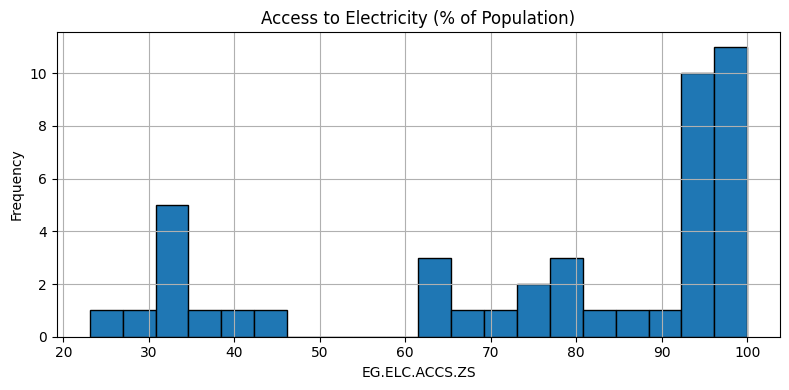

In [9]:
# Step 3: Visualise the 'EG.ELC.ACCS.ZS' column with a histogram
plt.figure(figsize=(8, 4))
plt.hist(countries_df["EG.ELC.ACCS.ZS"].dropna(), bins=20, edgecolor='black')
plt.title("Access to Electricity (% of Population)")
plt.xlabel("EG.ELC.ACCS.ZS")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

Skewness: -0.8836596584527003


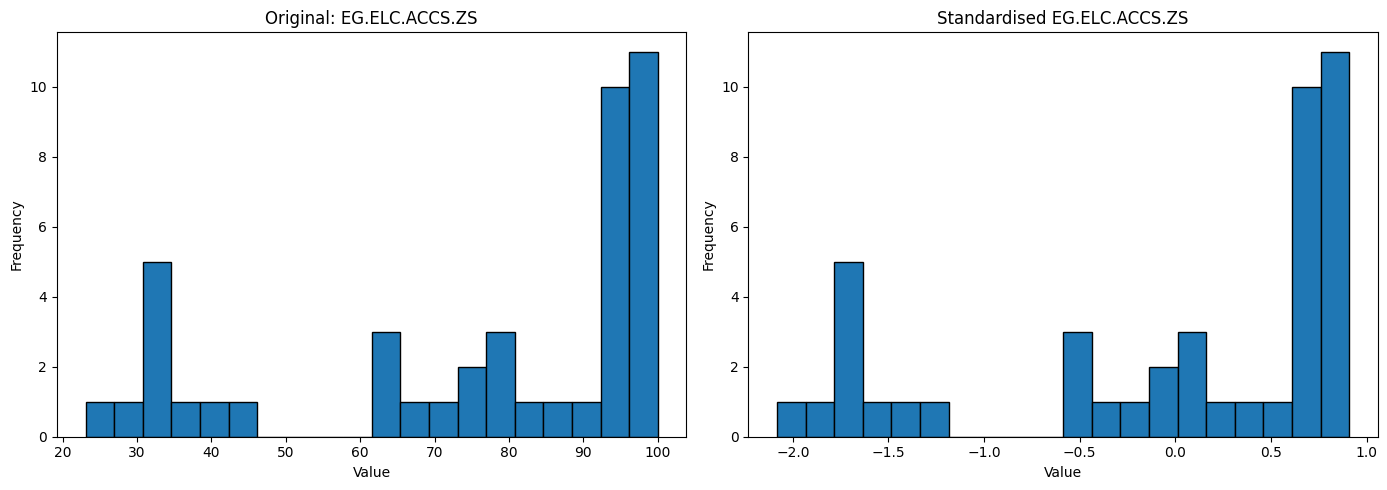

Scaling method used: Standardised


In [10]:
# Step 4: Check skewness to determine scaling method
skewness = countries_df["EG.ELC.ACCS.ZS"].skew()
print(f"Skewness: {skewness}")

# Step 5: Choose scaler based on skewness
if abs(skewness) > 1:
    scaler = MinMaxScaler()
    scale_type = "Normalised"
else:
    scaler = StandardScaler()
    scale_type = "Standardised"

# Step 6: Apply scaling, drop NaNs 
access_values = countries_df[["EG.ELC.ACCS.ZS"]].dropna()
scaled_values = scaler.fit_transform(access_values)

# Step 7: Plot original and scaled data
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original data histogram
axes[0].hist(access_values["EG.ELC.ACCS.ZS"], bins=20, edgecolor='black')
axes[0].set_title("Original: EG.ELC.ACCS.ZS")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

# Scaled data histogram
axes[1].hist(scaled_values, bins=20, edgecolor='black')
axes[1].set_title(f"{scale_type} EG.ELC.ACCS.ZS")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Step 8: Output the scale type used
print("Scaling method used:", scale_type)